# SVM Classifier for non-linearly separable data

In [ ]:
# Import usual libraries
import numpy as np
import matplotlib.pyplot as plt

# Make all figures tiny for readability purpose
from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

## 1. Let's build our "XOR" dataset

Let's try to classify a non-linearly separable dataset like this one

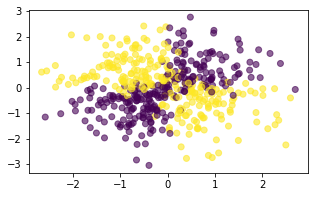

To that end, we will create a 2D dataset using [logical XOR gates](https://en.wikipedia.org/wiki/XOR_gate)

Try to understand how this work by playing with `np.logical_xor` in the cells below:

In [ ]:
print(np.logical_xor(True, True))
print(np.logical_xor(True, False))
print(np.logical_xor(False, False))

In [ ]:
np.logical_xor([True, True, False], [True, False, False])

Let's now create a own synthetic 2D dataset where $y=1$ _if and only if_ (X1>0 **xor** X2>0)

Make sure to understand the logic coded for you below

In [ ]:
# Number of datapoints
n = 500
noise = 0.2

In [ ]:
# First, build our X1,X2 randomly from gaussian distributions
np.random.seed(0)
X = np.random.randn(n, 2)
plt.scatter(X[:,0], X[:,1])
plt.xlabel("X1")
plt.ylabel("X2");

In [ ]:
print(X.shape)
x1 = X[:, 0]
x2 = X[:, 1]

In [ ]:
# Then, we build our binary class y 
# where y=1 if and only if (X1 > ε xor X2 > ε)
# epsilon ε not exactly zero to simulate "noise" 

epsilon = noise * np.random.randn(n, )

y_bool = np.logical_xor(
    x1 > epsilon, 
    x2 > epsilon
)
y = np.where(y_bool, 1, 0)

In [ ]:
# We have re-created the XOR quadrant!
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)

## 2 - Linear SVM

Welcome _Support Vector Machine (SVM)_ 🎉

SVM classifier's goal is to find the best vector **w**

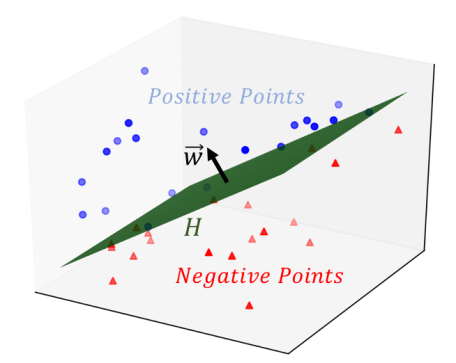

- whose direction uniquely determines the decision boundary hyperplan (orthogonal)
- which maximises the margin (inversly proportional to $||\textbf{w}||^2$)
- which minimizes the sum of hinge losses for outliers

That is to say, we want to minimize the following loss
$$\\Loss(\textbf{w}, X) =||\textbf{w}||^2 + C \sum_{i=1}^{n} HingeLoss(\textbf{w}, X_i)$$

👉 **w** contains all inner params of the model computed during `.fit()`  
👉 `C` is the **cost** associated with the **wrong** classification

___
❓ Fit a **linear** SVC classifier on the whole dataset with the value `C` = 1. 

❓ Visualize the decision boundaries of your model using the `plot_decision_regions` function given to you in `utils/plots.py`

In [ ]:
from utils.plots import plot_decision_regions

# Your code below

❓Save below your "guesstimated" accuracy score for such model (roughly) 

In [ ]:
linear_svm_score = ?

❓ Do you think the value of `C` has any importance in this case?

<details><summary>Answer</summary>
    
☝️ linear SVM classifiers always separate data points by a straight line, whathever the cost C applied to wrongly classified datapoints. We are _structurally_ trying to fit the wrong type of model to the dataset. 

</details>

❓ Do you think a Logistic Regression would perform better? Feel free to try.

🧪 Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('linear_svm',
    linear_svm_score=linear_svm_score)
result.write()
print(result.check())

## 3. Kernel SVM 🔥

📚 First, **read section 5 (Kernels) of today's lecture carefully**. Take your time, it is part of the challenge

❓In your own words, what is a Kernel in one sentence?

<details>
    <summary>A possible answer</summary>

It is a measure of "similarity" between points, which is used to classify points in SVM models (two points with large similarity would be classified similarly)
</details>

❓Cite below 4 different kernel by their names

<details>
    <summary>A possible answer</summary>

- Linear
- Polynomial
- Radial Basis Fonction (rbf)
- Sigmoid
</details>

## 3.2 Polynomial Kernels

A polynomial kernel of degree 2 is as follows 
    $$K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^2$$

By changing the kernel, we have changed our notion of _similarity_: instead of measuring similarity by how close the points are in terms of dot product ("cosine similarity") for the linear kernel, we are measuring similarity based on **whether points are within a circle to each other or not.** 

This is **equivalent** to creating the new quadratic features as below (Kernel Trick)
    $$\phi(x) = \begin{bmatrix} x_1^2 \\ x_1 x_2 \\ x_2 x_1 \\ x_2^2 \\  \sqrt{2c} \ x_1 \\ \sqrt{2c} \ x_2\end{bmatrix}$$

❓ Intuitively speaking, what's the minimum number of kernel "degrees" `d` do you think we need to best fit our XOR dataset? 

<details>
    <summary>Answer</summary>

`d=2` should be enough because our XOR condition can be computed from polynom `x1 * x2`
    
$$    
    class = 
\begin{cases}
    0 & \text{if } x_1 x_2 > 0\\
    1 & \text{otherwise}
\end{cases}
$$
</details>


❓ Fit and plot a SVM `poly` of degree 2, keeping `C = 100` large enough so as to visualize the "maximum margin classifier"

❓ Given that you know how this XOR dataset has been engineered, which adjectives best describe your svm's performance?

In [ ]:
a = "is underfitting"
b = "captures all reducible error"
c = "has too high variance"
d = "has only irreducible errors left"

poly_svm_performance = [] # fill the list with the answer(s)

🧪 Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('poly_svm',
    poly_svm_performance=poly_svm_performance)
result.write()
print(result.check())

### Moons dataset

Let's now try with a harder dataset to classifiy!

In [ ]:
from sklearn.datasets import make_moons

n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

❓ Can you easily fit a polynomial SVM kernel to such dataset? 

Try it out **visually** below by changing the values of `C` and `degree`! 

(`pip install ipywidget` if you haven't done it already)

In [ ]:
from ipywidgets import interact

@interact(C=[1, 10, 1000, 10000, 100000], degree=[1,2,3,4,5,6,7,8,9])
def svc(C, degree):
    svm = SVC(kernel='poly', C=C, degree=degree)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

☝️ Pretty hard, right? A polynomial kernel may not be the best choice for such data

## 3.3 RBF - Radial Basis Function Kernel (aka gaussian)

Here comes the RBF Kernel! 
Pretty much the go-to kernel for SVM (and default one in sklearn).  
It proves very robust to variety of problems, but requires gridsearching its hyper-parameter $\lambda$

$K(\textbf{a},\textbf{b}) = \exp[ \left( - \gamma ||\textbf{a}-\textbf{b}||^2\right)$

- The larger the euclidian distance between two points $||\textbf{a}-\textbf{b}||^2$, the closer the kernel function is to zero. This means that two points far away are more likely to be different.

- `gamma` $\gamma$ reduces each instance’s range of influence on the others (**myopia**). Stronger $\gamma$ values will make your model overfit by looking "too closely" at small-scale irregularities

- `C` still controls the **hardness** of the margin. Stronger values will make your model overfits.

In [ ]:
# Let's show below the impact of gamma "myopia" in the Kernel
for gamma in np.linspace(0.1, 1, 4):
    plt.plot(np.exp(-gamma*np.linspace(0, 3, 100)**2),
             label=f'gamma = {gamma}')
plt.ylim(0,)
plt.title('RBF Kernel')
plt.xlabel('euclidian distance between points')
plt.legend();

❓ Fit and plot decision regions of an SVM classifier with an RBF kernel

- Start with a model with very low variance (ex: `gamma=0.01` and `C=0.1`)
- Increase `gamma` until you observe obvious overfitting. It should be clearly visible on the graph. 

❓ Now, use you best estimated value of gamma (for instance `gamma=1`), and increase `C` this time until you overfit


☝️ Feel free to create your own interactive plot using `@interact` as above and try to "visually" fine the best `C` and `gamma`

❓Store below your best visual guess for `C` and `gamma` (rounded to power of tens: 0.1, 1, 10, 100 ...)

In [ ]:
best_c = ?
best_gamma = ?

🧪 Test your code

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('rbf_svm',
                         best_c=best_c, 
                         best_gamma=best_gamma)
result.write()
print(result.check())

## 3.4 Sigmoid kernel

$K(\textbf{a},\textbf{b}) = tanh(\gamma \textbf{a}^T \textbf{b} +r)$

In [ ]:
# The "tangent hyperbolic" function ressembles sigmoid but can take negative values
x = np.linspace(-3,3,100)
plt.plot(x, np.tanh(x))
plt.xlabel('cosine distance'); plt.title('Sigmoid Kernel');

☝️ The Sigmoid kernel compresses the "cosine similarity" used in the linear kernel into a [-$\gamma$,+$\gamma$] interval.

❓ Try to **visually** fintune your rbf model, doing a coarse grain search for 
- `C=[0.1, 1, 10, 100, 1000, 10000]` 
- `gamma = [0.001, 0.01, 0.1, 1, 10]`  

using `@interact` decorator combined with `plot_decision_regions`

☝️  Not easy to make it work visually, right? 

Besides, a third hyper-parameter $r$ (`coef0` in sklearn) in the Kernel formula above has not been tested yet.

Testing out manually **three** hyper-params becomes **too complex**. Time for a automated GridSearch!

#### Grid Search the best `sigmoid` kernel

❓ `RandomizedSearchCV` for `gamma`, `C` and `coef0` at the same time
 
Using your visual intuitions above to define plausible range of values to try-out

❓ Plot your best model's decision boundaries

❓ 5-fold cross-validated its score and store your results carefully

In [ ]:
# Your answer
sigmoid_svm_cv_accuracy = ?

🧪 Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('sigmoid_svm',
    sigmoid_svm_cv_accuracy=sigmoid_svm_cv_accuracy)
result.write()
print(result.check())

## 4. Generalization

❓Choose your `best_svm` model to put in "production" in your app on the cloud. Fit it on all half moon dataset.

best_svm = best_svm

After few days, it has received and predicted new datapoints never been seen before (our "test set")  

In [ ]:
# Generate a half-moon test_set of size n_test
n_test = 100
X_test, y_test = make_moons(n_samples=n, noise=0.2, random_state=1)

X_full = np.vstack((X, X_test))
y_full = np.append(y, values = y_test)
test_idx = np.arange(n,n+n_test)

❓ Visualize its performance by doing `plot_decision_regions` including `test_idx` as optional argument.  
Count how many misclassified test samples you get!

In [ ]:
# Viz

In [ ]:
# Your answer
number_misclassified_test = ?

🧪 Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('generalization',
    number_misclassified_test=number_misclassified_test)
result.write()
print(result.check())

## 5. kNN vs. SVM ?

Such non-linear problem could also well fit a kNN classifier.  
Try to find visually the best `k` visually, and compare its behavior to the SVM.

🏁 Congratulation! Dont forget to **commit** and **push** your notebook